In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import kagglehub

path = kagglehub.dataset_download("furkanakdeniz/asl-handsign-dataset-grayscaled-thresholded")

print("Path to dataset files:", path)

100%|██████████| 719M/719M [00:31<00:00, 24.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/furkanakdeniz/asl-handsign-dataset-grayscaled-thresholded/versions/1


In [3]:
import os
print("Dataset directory structure:")
print(os.listdir(path))


Dataset directory structure:
['asl-dataset-gray', 'asl-dataset']


In [4]:
dataset_path =  "/root/.cache/kagglehub/datasets/furkanakdeniz/asl-handsign-dataset-grayscaled-thresholded/versions/1/asl-dataset/asl-dataset"

In [5]:
# Alphabets disponibles dans le dataset
alphabet_array = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

## Pré-traitement

In [6]:
# Charger les images et leurs étiquettes
image_arr = []
image_name_value = []

# Taille cible pour toutes les images
target_size = (28, 28)

for letter in alphabet_array:
    path_letter = os.path.join(dataset_path, "train", letter)
    if not os.path.exists(path_letter):
        print(f"Le dossier {path_letter} n'existe pas.")
        continue

    for image_name in os.listdir(path_letter):
        image_path = os.path.join(path_letter, image_name)
        image = plt.imread(image_path)

        if image is None:
            print(f"Erreur de lecture de l'image {image_path}")
            continue

        if image.ndim == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        resized_image = cv2.resize(image, target_size)
        image_arr.append(resized_image.flatten())
        image_name_value.append(letter)

In [7]:
# Normalisation des données

resized_image = resized_image / 255.0

## Visualisation des images

In [8]:
def display_images(path_letter, num_images=5):
    image_names = os.listdir(path_letter)
    images_to_show = image_names[:num_images]  # Sélectionner un nombre d'images à afficher

    plt.figure(figsize=(10, 10))

    for idx, image_name in enumerate(images_to_show):
        image_path = os.path.join(path_letter, image_name)
        image = plt.imread(image_path)

        plt.subplot(1, num_images, idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(image_name)
        plt.axis('off')

    plt.show()

Visualisation des images pour la lettre A:


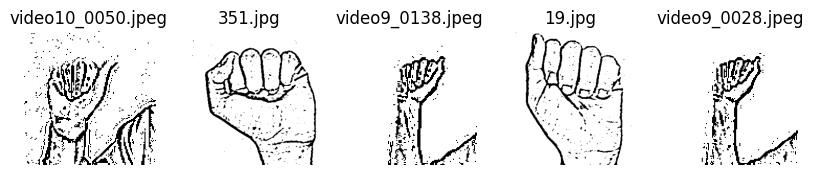

Visualisation des images pour la lettre B:


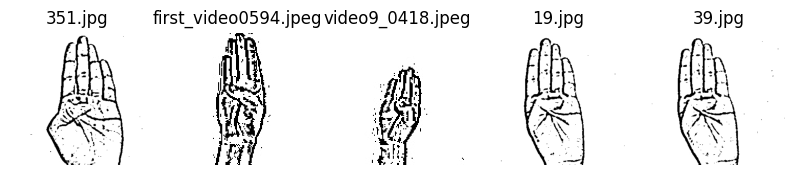

Visualisation des images pour la lettre C:


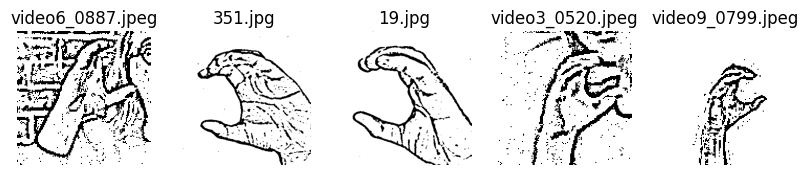

Visualisation des images pour la lettre D:


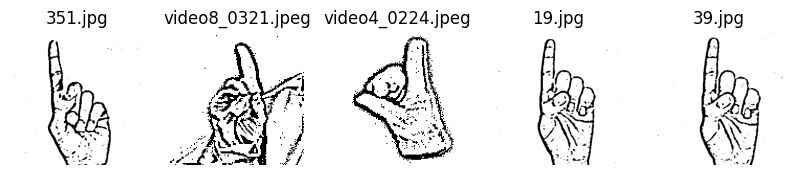

Visualisation des images pour la lettre E:


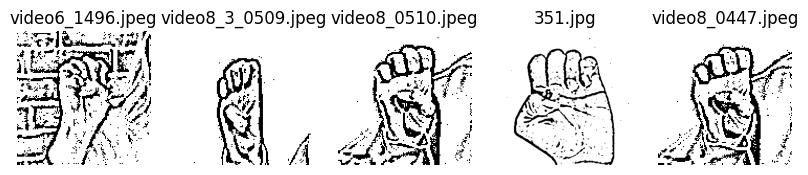

Visualisation des images pour la lettre F:


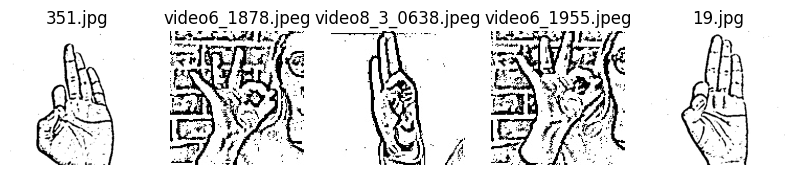

Visualisation des images pour la lettre G:


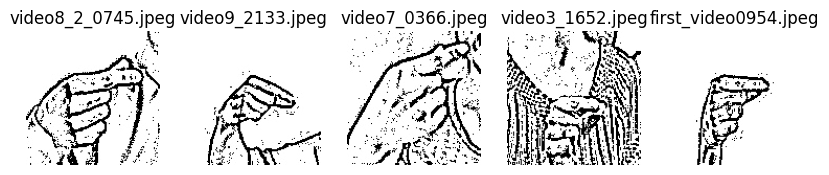

Visualisation des images pour la lettre H:


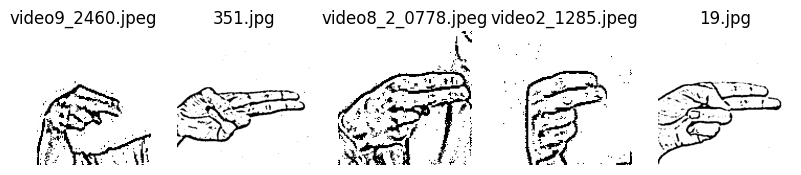

Visualisation des images pour la lettre I:


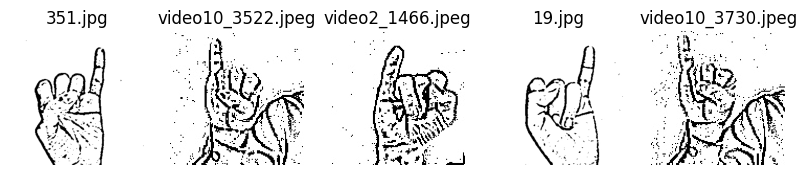

Visualisation des images pour la lettre K:


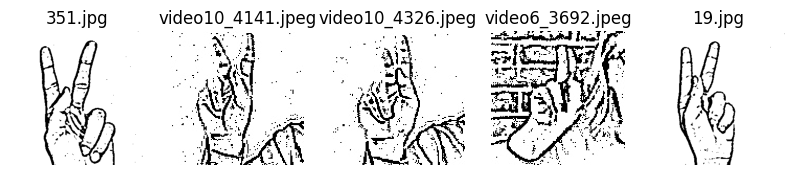

Visualisation des images pour la lettre L:


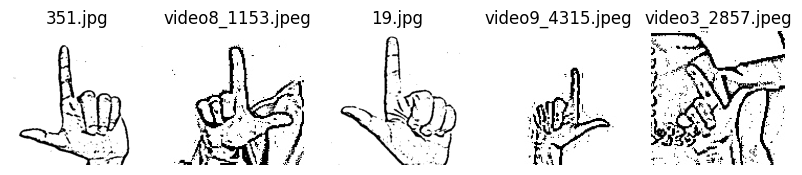

Visualisation des images pour la lettre M:


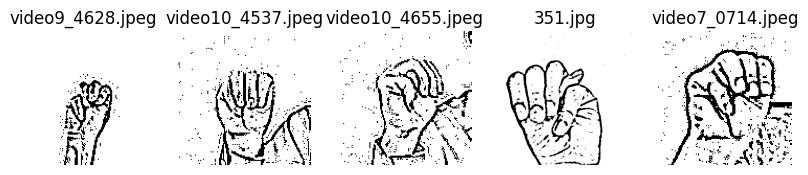

Visualisation des images pour la lettre N:


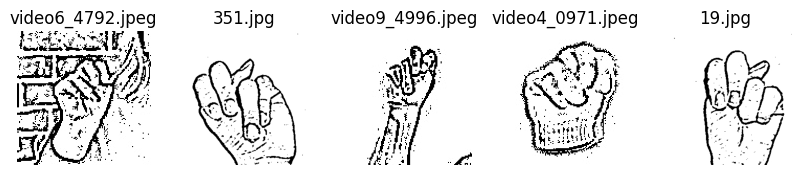

Visualisation des images pour la lettre O:


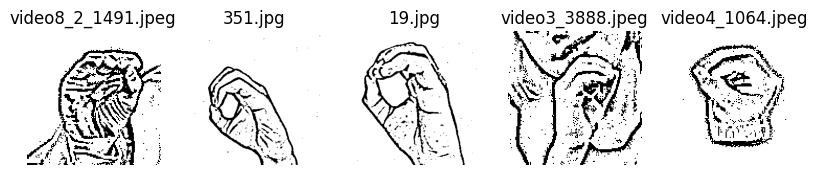

Visualisation des images pour la lettre P:


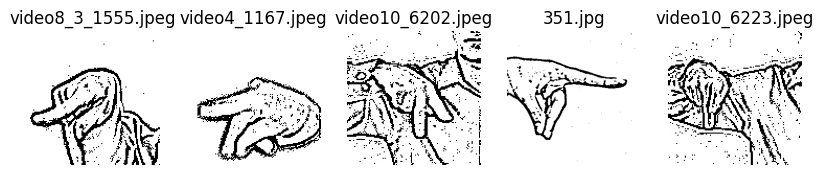

Visualisation des images pour la lettre Q:


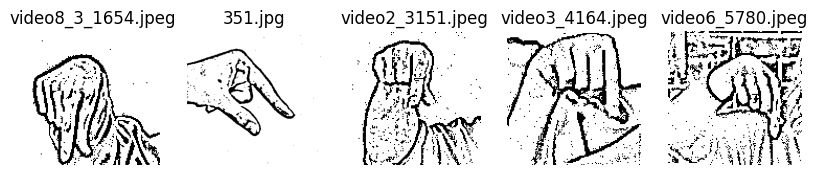

Visualisation des images pour la lettre R:


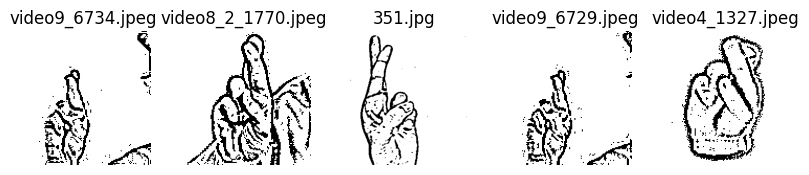

Visualisation des images pour la lettre S:


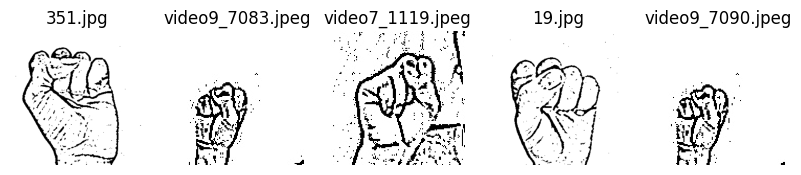

Visualisation des images pour la lettre T:


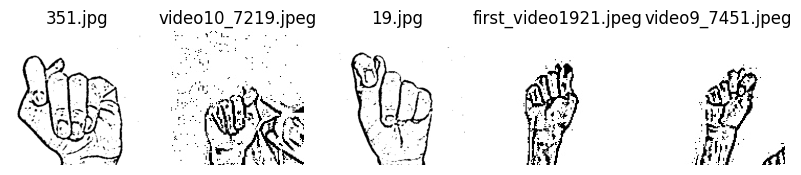

Visualisation des images pour la lettre U:


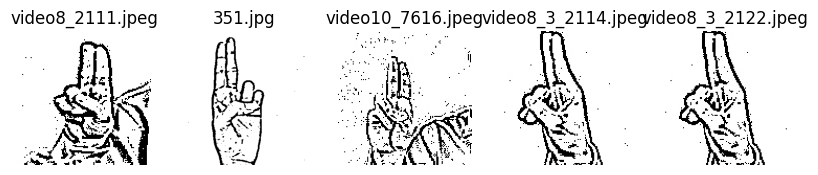

Visualisation des images pour la lettre V:


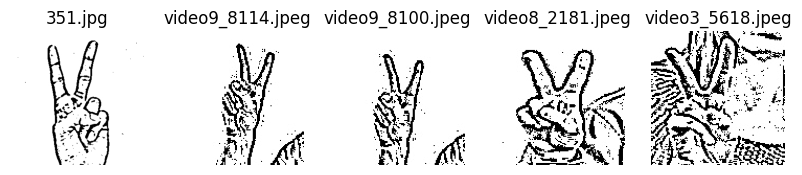

Visualisation des images pour la lettre W:


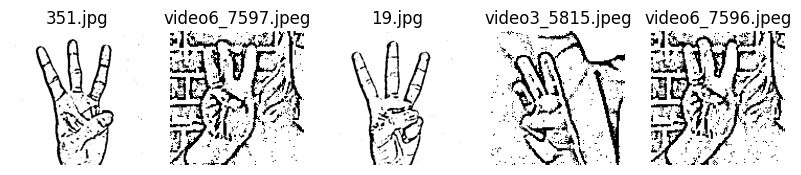

Visualisation des images pour la lettre X:


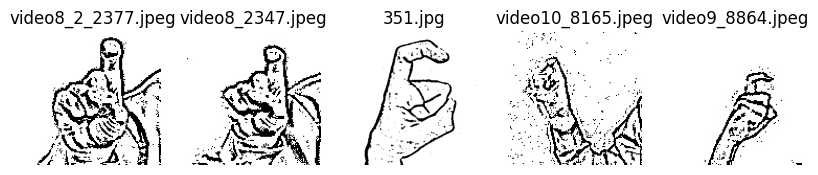

Visualisation des images pour la lettre Y:


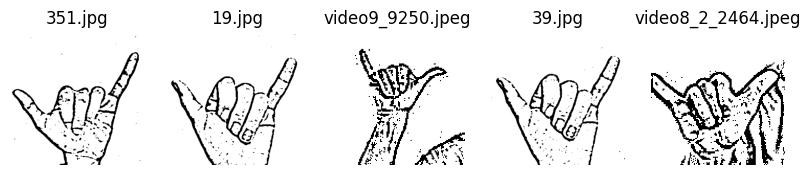

In [9]:
for letter in alphabet_array:
    path_letter = os.path.join(dataset_path, "train", letter)
    if not os.path.exists(path_letter):
        print(f"Le dossier {path_letter} n'existe pas.")
        continue

    print(f"Visualisation des images pour la lettre {letter}:")
    display_images(path_letter, num_images=5)

In [10]:
# Convertir les listes en tableaux numpy
X = np.array(image_arr)
y = np.array(image_name_value)

## Exploration des données

In [11]:
# Créer un mapping des étiquettes vers des entiers
label_to_int = {label: idx for idx, label in enumerate(np.unique(y))}
y_data = np.array([label_to_int[label] for label in y])

# Affichage du nombre d'images traitées pour chaque lettre
for letter in alphabet_array:
    count = y_data.tolist().count(label_to_int[letter])
    print(f"Nombre d'images pour {letter}: {count}")

Nombre d'images pour A: 1220
Nombre d'images pour B: 1312
Nombre d'images pour C: 1150
Nombre d'images pour D: 1538
Nombre d'images pour E: 1524
Nombre d'images pour F: 1528
Nombre d'images pour G: 743
Nombre d'images pour H: 1332
Nombre d'images pour I: 1302
Nombre d'images pour K: 1360
Nombre d'images pour L: 1258
Nombre d'images pour M: 1284
Nombre d'images pour N: 1332
Nombre d'images pour O: 1029
Nombre d'images pour P: 1088
Nombre d'images pour Q: 1111
Nombre d'images pour R: 1200
Nombre d'images pour S: 1192
Nombre d'images pour T: 1196
Nombre d'images pour U: 1296
Nombre d'images pour V: 1319
Nombre d'images pour W: 1148
Nombre d'images pour X: 1254
Nombre d'images pour Y: 1334


In [13]:
!pip install dagshub
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.2/252.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0

In [15]:
pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 7.3 MB/s eta 0:00:00


In [ ]:
import dagshub
import mlflow
from sklearnex import patch_sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Initialize DagsHub with MLflow
dagshub.init(repo_owner='ayoub.boudra1', repo_name='deep-learning-model', mlflow=True)

# Patch scikit-learn to use Intel optimizations
patch_sklearn()

# Generate a synthetic dataset (replace with your dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start MLflow tracking
with mlflow.start_run():
    # Log parameters
    mlflow.log_param('kernel', 'rbf')
    mlflow.log_param('C', 10)
    mlflow.log_param('gamma', 'scale')
    mlflow.log_param('degree', 2)


    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Log the model
    mlflow.sklearn.log_model(model, "Logistic_Regression_Model")

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Log metrics
    mlflow.log_metric('accuracy', accuracy)

Initialized MLflow to track repo "ayoub.boudra1/deep-learning-model"

Repository ayoub.boudra1/deep-learning-model initialized!

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
2024/12/07 23:49:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.85
🏃 View run sneaky-fowl-508 at: https://dagshub.com/ayoub.boudra1/deep-learning-model.mlflow/#/experiments/0/runs/88dd53e7bacc43b4b5ec9dddba6196f1
🧪 View experiment at: https://dagshub.com/ayoub.boudra1/deep-learning-model.mlflow/#/experiments/0


### Diviser les données en ensembles d'entraînement et de test


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.50%


In [21]:
# Affichage du rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



GridSearch

In [31]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [33]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'solver': ['liblinear']  # Solver adapté pour L1 (en plus de L2)
}

In [34]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=1)

In [27]:
# Résultats du GridSearch
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Meilleurs hyperparamètres : {best_params}")
print(f"Meilleure précision moyenne : {best_score:.4f}")

Meilleurs hyperparamètres : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleure précision moyenne : 0.8750


In [41]:
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:, 1]

In [42]:
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

AUC: 0.9183


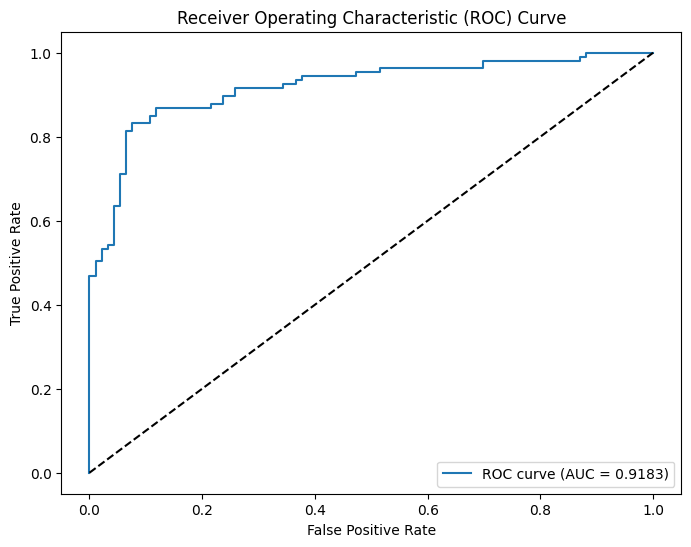

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np


model = LogisticRegression()

# Effectuer la validation croisée (5-fold cross-validation)
scores = cross_val_score(model, X_train, y_train, cv=5)

# Afficher la performance moyenne et l'écart type
print(f"Scores de validation croisée : {scores}")
print(f"Performance moyenne : {np.mean(scores)}")
print(f"Écart type des scores : {np.std(scores)}")


Scores de validation croisée : [0.85625 0.875   0.85625 0.86875 0.88125]
Performance moyenne : 0.8674999999999999
Écart type des scores : 0.010000000000000016
